#            __MiniBrain Project__


## MiniBrain v0.5:


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


#### HeadCT Image Analysis:

In [3]:
img_head = Image.open("/Users/deniz/Desktop/MiniBrain/MedNIST/HeadCT/000000.jpeg")
arr_head = np.array(img_head)
print("Shape:", arr_head.shape)
print("Data Type", arr_head.dtype)
print("Min Pixel:", arr_head.min())
print("Max Pixel:", arr_head.max())
print("Mean:", arr_head.mean())

Shape: (64, 64)
Data Type uint8
Min Pixel: 0
Max Pixel: 255
Mean: 61.2373046875


#### Creating a Pixel Density Histogram:


Text(0, 0.5, 'Frequency')

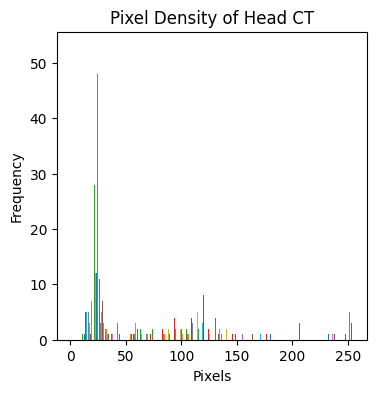

In [4]:
plt.figure(figsize = (4,4))
plt.hist(arr_head,bins=50)
plt.title('Pixel Density of Head CT')
plt.xlabel('Pixels')
plt.ylabel('Frequency')

#### Binary Thresholding:


(-0.5, 63.5, 63.5, -0.5)

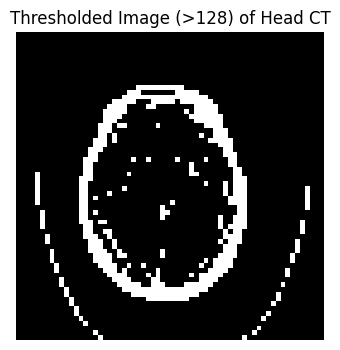

In [5]:
threshold = 128
binary_bool_head = arr_head > threshold
plt.figure(figsize = (4,4))
plt.imshow(binary_bool_head,cmap="gray")
plt.title(f"Thresholded Image (>{threshold}) of Head CT")
plt.axis('off')

#### White Pixel Size and Their Ratios + Mean Intensity:


In [6]:
white_pixel_size_head = binary_bool_head[binary_bool_head].size
print("White Pixel Size Head:", white_pixel_size_head)

white_pixel_ratio_head =  white_pixel_size_head/arr_head.size * 100
print("White Pixel Ratio Head:", white_pixel_ratio_head)

mean_intensity_head = arr_head.mean()
print("Mean Intensity Head:", mean_intensity_head)



White Pixel Size Head: 455
White Pixel Ratio Head: 11.1083984375
Mean Intensity Head: 61.2373046875


#### AbdomenCT Image Analysis:

In [7]:
img_abdomen = Image.open("/Users/deniz/Desktop/MiniBrain/MedNIST/AbdomenCT/000000.jpeg")
arr_abdomen = np.array(img_abdomen)
print("Shape:", arr_abdomen.shape)
print("Data Type:", arr_abdomen.dtype)
print("Min Pixel:", arr_abdomen.min())
print("Max Pixel:", arr_abdomen.max())
print("Mean:", arr_abdomen.mean())

Shape: (64, 64)
Data Type: uint8
Min Pixel: 81
Max Pixel: 255
Mean: 109.7138671875


Text(0, 0.5, 'Frequency')

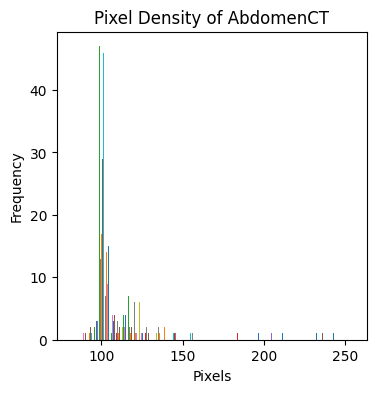

In [8]:
plt.figure(figsize = (4,4))
plt.hist(arr_abdomen,bins=50)
plt.title('Pixel Density of AbdomenCT')
plt.xlabel('Pixels')
plt.ylabel('Frequency')

#### Threshold Comparison for AbdomenCT

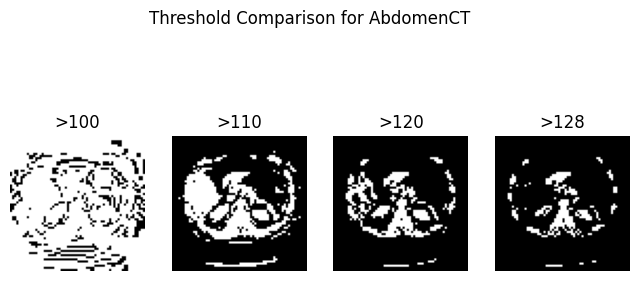

In [9]:
thresholds = [100, 110, 120, 128]
fig, axes = plt.subplots(1, 4, figsize=(8,4))

for i, t in enumerate(thresholds):
    binary_bool_abdomen = arr_abdomen > t
    axes[i].imshow(binary_bool_abdomen,cmap="gray")
    axes[i].set_title(f'>{t}')
    axes[i].axis('off')

plt.suptitle("Threshold Comparison for AbdomenCT")
plt.show()

In [10]:
threshold = 120
binary_bool_abdomen = arr_abdomen > threshold

In [11]:
white_pixel_size_abdomen = binary_bool_abdomen[binary_bool_abdomen].size
print("White Pixel Size Abdomen:", white_pixel_size_abdomen)

white_pixel_ratio_abdomen =  white_pixel_size_abdomen/arr_abdomen.size * 100
print("White Pixel Ratio Abdomen:", white_pixel_ratio_abdomen)

mean_intensity_abdomen = arr_abdomen.mean()
print("Mean Intensity Abdomen:", mean_intensity_abdomen)


White Pixel Size Abdomen: 583
White Pixel Ratio Abdomen: 14.2333984375
Mean Intensity Abdomen: 109.7138671875


#### HeadCT vs. AbdomenCT: Threshold Results as a Bar Chart



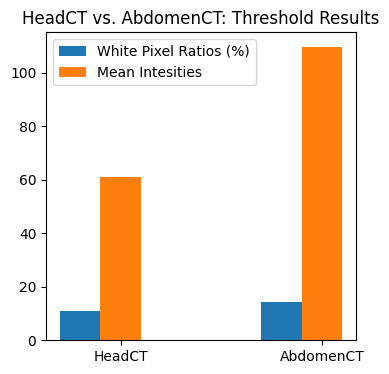

<Figure size 640x480 with 0 Axes>

In [12]:
labels = ['HeadCT','AbdomenCT']
white_pixel_ratios = [11.10,14.23]
mean_intensities = [61.24,109.71]

fig,ax = plt.subplots(figsize=(4,4))
x = np.arange(len(labels))
width=.2
p1 = ax.bar(x-width,white_pixel_ratios,width,label='White Pixel Ratios (%)')
p2 = ax.bar(x,mean_intensities,width,label='Mean Intesities')
ax.set_title('HeadCT vs. AbdomenCT: Threshold Results')
plt.xticks(x,labels)
plt.legend()
plt.show()
plt.savefig("minibrain_v05.png")

## MiniBrain v0.6

#### Hand Xray Image Analysis

Shape: (64, 64)
Data Type uint8
Min Pixel: 0
Max Pixel: 255
Mean: 82.01123046875


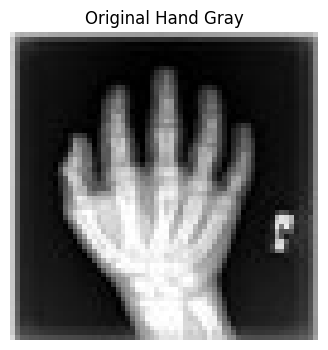

In [13]:
img_hand = Image.open("/Users/deniz/Desktop/MiniBrain/MedNIST/Hand/000000.jpeg")
arr_hand = np.array(img_hand)
print("Shape:", arr_hand.shape)
print("Data Type", arr_hand.dtype)
print("Min Pixel:", arr_hand.min())
print("Max Pixel:", arr_hand.max())
print("Mean:", arr_hand.mean())

plt.figure(figsize = (4,4))
plt.title(f'Original Hand Gray')
plt.axis('off')
plt.imshow(img_hand,cmap='gray')


#### Binary Thresholding With threshold_otsu:

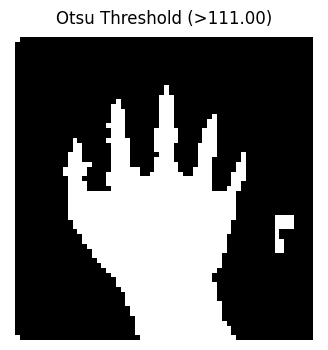

In [14]:
from skimage.filters import threshold_otsu
thresh = threshold_otsu(arr_hand)
binary_global_hand = arr_hand > thresh
plt.figure(figsize = (4,4))
plt.title(f'Otsu Threshold (>{thresh:.2f})')
plt.axis('off')
plt.imshow(binary_global_hand,cmap='gray')

#### Using threshold_local:

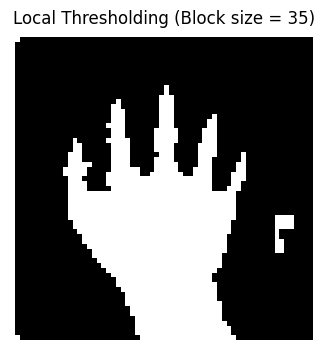

In [15]:
from skimage.filters import threshold_local

block_size =35 
local_threshold_hand = threshold_local(arr_hand,block_size,offset=10)
binary_local_hand = arr_hand > local_threshold_hand
plt.figure(figsize = (4,4))
plt.title(f'Local Thresholding (Block size = {block_size})')
plt.axis('off')
plt.imshow(binary_global_hand,cmap='gray')

#### Comparison of Global Threshold vs. Local Threshold 

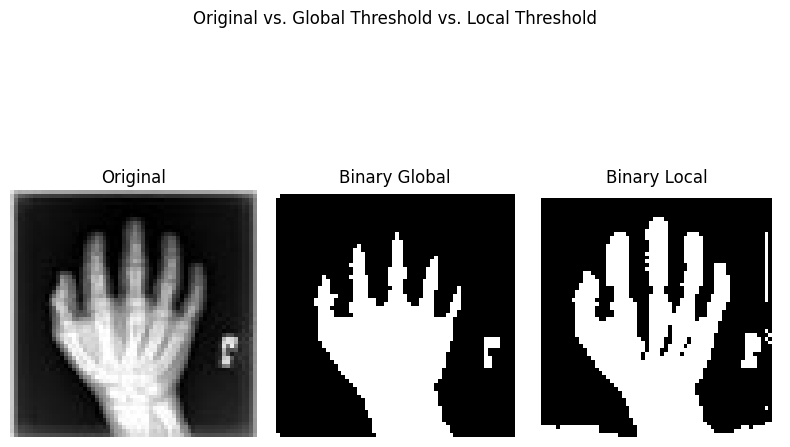

In [16]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(8,6))
fig.suptitle('Original vs. Global Threshold vs. Local Threshold')

ax1.imshow(img_hand,cmap='gray')
ax1.set_title('Original')
ax1.axis('off')

ax2.imshow(binary_global_hand,cmap='gray')
ax2.set_title('Binary Global')
ax2.axis('off')

ax3.imshow(binary_local_hand,cmap='gray')
ax3.set_title('Binary Local')
ax3.axis('off')
plt.tight_layout()
plt.show()



#### Gaussian Blurring

(-0.5, 63.5, 63.5, -0.5)

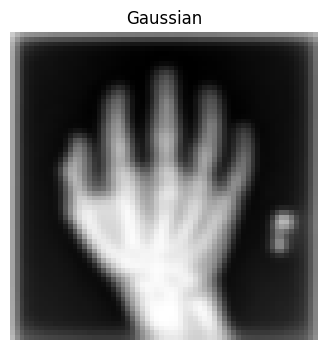

In [17]:
from skimage.filters import gaussian
gaussian_hand = gaussian(arr_hand)
plt.figure(figsize = (4,4))
plt.imshow(gaussian_hand,cmap='gray')
plt.title('Gaussian')
plt.axis('off')

#### Gaussian Smooting and Binary Thresholding With Otsu:

(-0.5, 63.5, 63.5, -0.5)

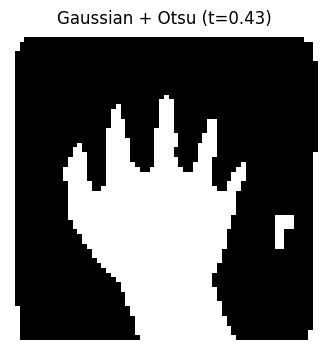

In [18]:
from skimage.filters import threshold_otsu
gaussian_hand = gaussian(arr_hand)
thresh_hand_gaussian = threshold_otsu(gaussian_hand)
binary_hand_gaussian = gaussian_hand > thresh_hand_gaussian
plt.figure(figsize = (4,4))
plt.imshow(binary_hand_gaussian,cmap='gray')
plt.title(f'Gaussian + Otsu (t={thresh_hand_gaussian:.2f})')
plt.axis('off')

#### Gaussian Filtering & Thresholding Comparison

In [19]:
def plot_comparison(original,gaussian,gaussian_otsu):
    fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(8,6),sharex=True,sharey=True)
    ax1.imshow(original,cmap='gray')
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(gaussian_hand,cmap='gray')
    ax2.set_title('Gaussian Hand')
    ax2.axis('off')
    ax3.imshow(binary_hand_gaussian,cmap='gray')
    ax3.set_title('Gaussian + Otsu')
    ax3.axis('off')
    plt.suptitle("Gaussian Filtering & Thresholding Comparison")
    plt.subplots_adjust(top=1.3)

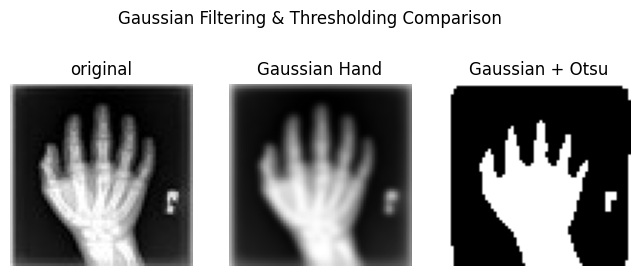

In [20]:
plot_comparison(arr_hand,gaussian_hand,binary_hand_gaussian)

#### Contrast Enhacement (Standard Histogram Equalization and CLAHE):

(-0.5, 63.5, 63.5, -0.5)

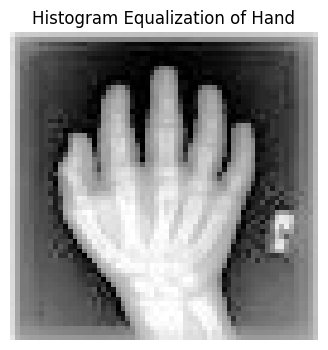

In [21]:
from skimage import exposure
hand_eq = exposure.equalize_hist(arr_hand)
plt.figure(figsize = (4,4))
plt.imshow(hand_eq,cmap='gray')
plt.title('Histogram Equalization of Hand')
plt.axis('off')

#### With CLAHE

(-0.5, 63.5, 63.5, -0.5)

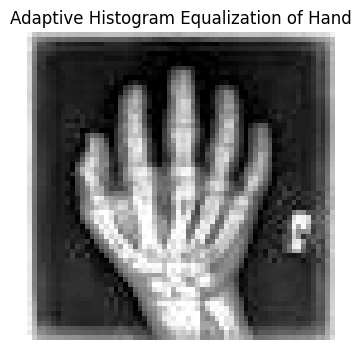

In [22]:
hand_adapt_eq = exposure.equalize_adapthist(arr_hand,clip_limit=0.03)
plt.figure(figsize = (4,4))
plt.imshow(hand_adapt_eq,cmap='gray')
plt.title('Adaptive Histogram Equalization of Hand')
plt.axis('off')

#### Histogram Equalization & Adaptive Histogram Equalization Comparison

In [23]:
def plot_comparison(original,hist_eq,adapt_hist_equ):
    fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(8,6),sharex=True,sharey=True)
    ax1.imshow(original,cmap='gray')
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(hand_eq,cmap='gray')
    ax2.set_title('Histogram Equalization')
    ax2.axis('off')
    ax3.imshow(hand_adapt_eq,cmap='gray')
    ax3.set_title('With CLAHE')
    ax3.axis('off')
    plt.suptitle("Histogram Equalization & Adaptive Histogram Equalization Comparison")
    plt.subplots_adjust(top=1.3)

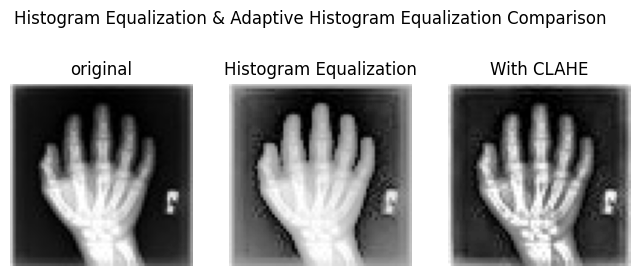

In [24]:
plot_comparison(arr_hand,hand_eq,hand_adapt_eq)

#### Morphological Filtering (Erosion & Dilation & Closing & Opening)

(-0.5, 63.5, 63.5, -0.5)

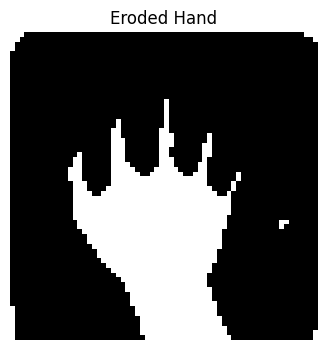

In [25]:
from skimage import morphology
eroded_hand = morphology.binary_erosion(binary_hand_gaussian)
plt.figure(figsize = (4,4))
plt.imshow(eroded_hand,cmap='gray')
plt.title('Eroded Hand')
plt.axis('off')


(-0.5, 63.5, 63.5, -0.5)

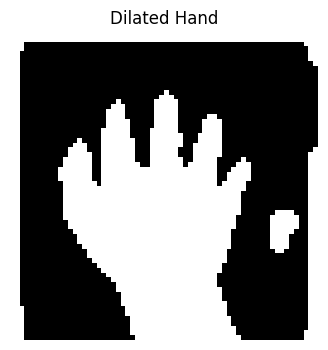

In [26]:
from skimage import morphology
dilated_hand = morphology.binary_dilation(binary_hand_gaussian)
plt.figure(figsize = (4,4))
plt.imshow(dilated_hand,cmap='gray')
plt.title('Dilated Hand')
plt.axis('off')

(-0.5, 63.5, 63.5, -0.5)

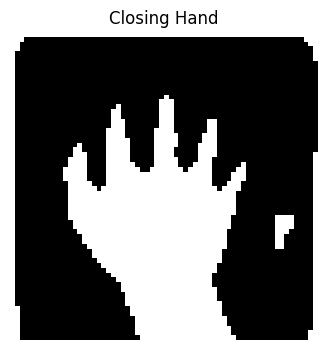

In [27]:
from skimage import morphology
closing_hand = morphology.closing(binary_hand_gaussian)
plt.figure(figsize = (4,4))
plt.imshow(closing_hand,cmap='gray')
plt.title('Closing Hand')
plt.axis('off')

(-0.5, 63.5, 63.5, -0.5)

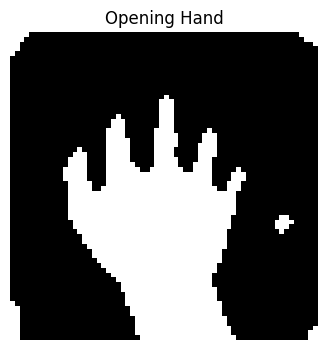

In [28]:
from skimage import morphology
opening_hand = morphology.opening(binary_hand_gaussian)
plt.figure(figsize = (4,4))
plt.imshow(opening_hand,cmap='gray')
plt.title('Opening Hand')
plt.axis('off')

#### Morphological Comparison

In [29]:
def plot_comparison(eroded_hand,dilated_hand,closing_hand,opening_hand):
    fig,(ax1,ax2,ax3,ax4) = plt.subplots(ncols=4,figsize=(8,6),sharex=True,sharey=True)
    ax1.imshow(eroded_hand,cmap='gray')
    ax1.set_title('Eroded Hand')
    ax1.axis('off')
    ax2.imshow(dilated_hand,cmap='gray')
    ax2.set_title('Dilated Hand')
    ax2.axis('off')
    ax3.imshow(closing_hand,cmap='gray')
    ax3.set_title('Closing Hand')
    ax3.axis('off')
    ax4.imshow(opening_hand,cmap='gray')
    ax4.set_title('Opening Hand')
    ax4.axis('off')
    plt.suptitle("Morphological Comparison")
    plt.subplots_adjust(top=1.3)

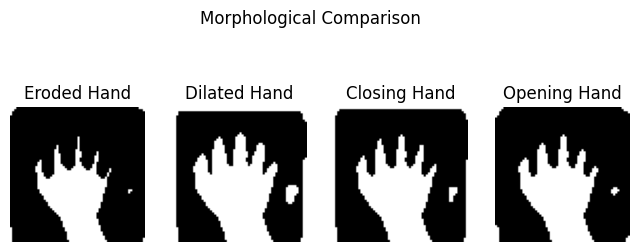

In [30]:
plot_comparison(eroded_hand,dilated_hand,closing_hand,opening_hand)

#### Segmentation 


(-0.5, 63.5, 63.5, -0.5)

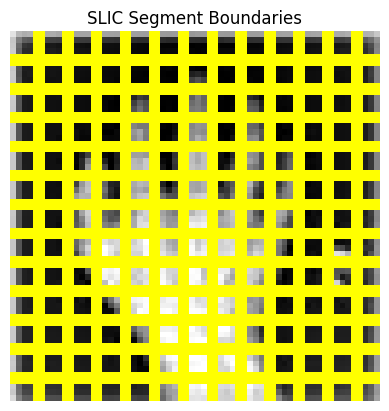

In [51]:
from skimage.segmentation import slic, mark_boundaries
from skimage.color import label2rgb
slic_hand = slic(arr_hand,n_segments=150,compactness=10,start_label=1,channel_axis=None)
segmented_hand = label2rgb(slic_hand,arr_hand,kind='avg')
marked_hand = mark_boundaries(arr_hand,slic_hand)

plt.imshow(marked_hand,cmap='gray')
plt.title("SLIC Segment Boundaries")
plt.axis('off')

##### 💡 compactness=0.1 gibi küçük değerler segmentleri şekle değil yoğunluk benzerliğine göre ayırır.

(-0.5, 63.5, 63.5, -0.5)

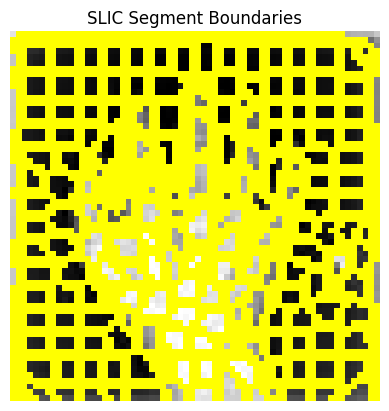

In [53]:
from skimage.segmentation import slic, mark_boundaries
from skimage.color import label2rgb
slic_hand = slic(arr_hand,n_segments=300,compactness=0.1,start_label=1,channel_axis=None)
segmented_hand = label2rgb(slic_hand,arr_hand,kind='avg')
marked_hand = mark_boundaries(arr_hand,slic_hand)

plt.imshow(marked_hand,cmap='gray')
plt.title("SLIC Segment Boundaries")
plt.axis('off')

#### Highlight Segment

#NOTE slic_hand: Her pikselin hangi süperpiksele ait olduğunu gösteriyor
#NOTE -  arr_hand: Gri tonlamalı orijinal el görüntüsü


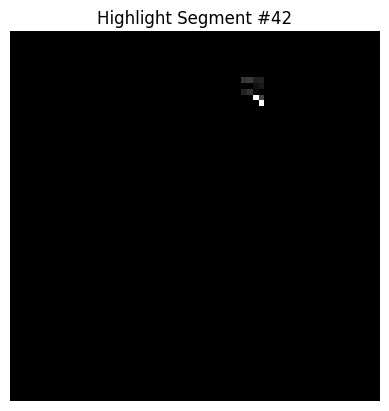

In [55]:
highlight_42 = np.zeros_like(arr_hand)
highlight_42[slic_hand == 42] = arr_hand[slic_hand == 42]

plt.imshow(highlight_42, cmap='gray')
plt.title("Highlight Segment #42")
plt.axis('off')
plt.show()

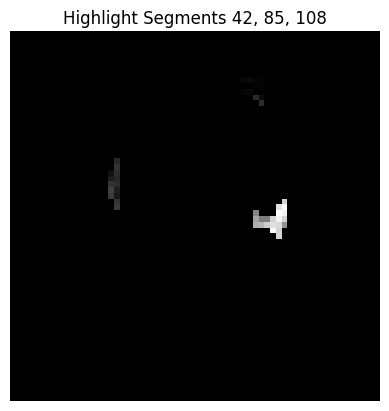

In [59]:
highlight_multi = np.zeros(arr_hand.shape[:])
selected_labels = [42, 85, 108]

for label in selected_labels:
    highlight_multi[slic_hand == label] = arr_hand[slic_hand == label]

plt.imshow(highlight_multi, cmap='gray')
plt.title("Highlight Segments 42, 85, 108")
plt.axis('off')
plt.show()

#### Mask

(-0.5, 63.5, 63.5, -0.5)

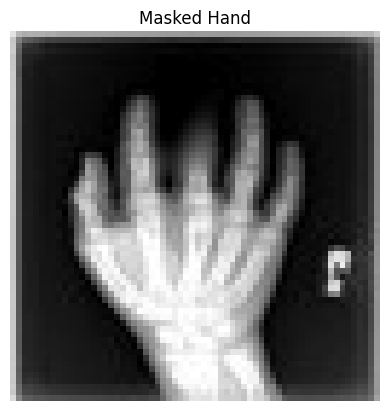

In [69]:
from skimage.restoration import inpaint
mask = np.zeros_like(arr_hand)
mask[5:25,25:35] = 1
mask_hand = inpaint.inpaint_biharmonic(arr_hand,mask)
plt.imshow(mask_hand,cmap='gray')
plt.title("Masked Hand")
plt.axis('off')


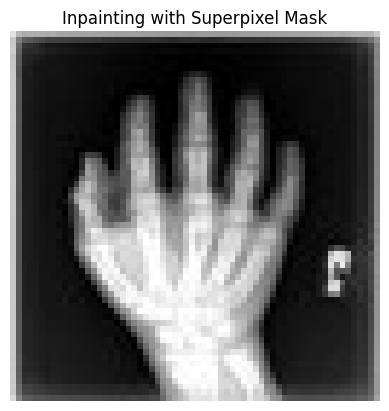

In [74]:
# Seçilen segmentlere göre maske oluştur (slic_hand süperpiksel etiketleri içermeli)
mask = np.isin(slic_hand, selected_labels)

# İnpaint uygula
inpainted_hand = inpaint.inpaint_biharmonic(arr_hand, mask, channel_axis=None)

# Görüntüle
plt.imshow(inpainted_hand, cmap='gray')
plt.title("Inpainting with Superpixel Mask")
plt.axis('off')
plt.show()

#### Finding Contour:

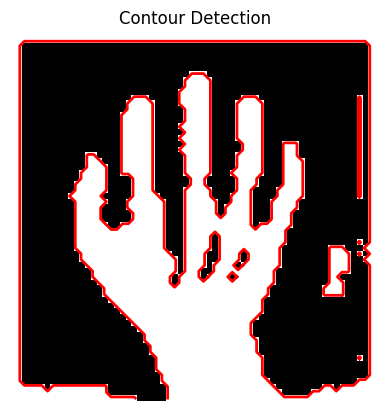

In [ ]:
from skimage import measure
contour_hand = measure.find_contours(binary_local_hand,0.8)
fig, ax = plt.subplots()
ax.imshow(binary_local_hand, cmap='gray')

for contour in contour_hand:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2, color='red')

ax.set_title("Contour Detection")
ax.axis('off')
plt.show()